<a href="https://colab.research.google.com/github/tpemartin/111-1-econDV/blob/main/data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Public link does not require auth
googlesheets4::gs4_deauth()
googlesheets4::read_sheet(
  "https://docs.google.com/spreadsheets/d/1lkts4hLkrAFAobONFXiEjgDnuUmXKci6YF--vg1pC1s/edit?usp=sharing",
  sheet="data 3"
) -> data3
head(data3)

✔ Reading from Exercise Data.

✔ Range ''data 3''.



Population,Characteristic,Country,Total Effect
<dbl>,<dbl>,<chr>,<dbl>
0.20,1,a,0.340
0.40,2,a,0.480
0.10,3,a,0.220
0.05,4,a,0.610
0.16,1,b,0.196
0.40,2,b,0.344


<img src="https://www.economist.com/sites/default/files/imagecache/original-size/20170325_WOC211_3.png" width="30%"/>

```
# 透明帶邊圓點
geom_point(
  shape = 21,
  mapping = aes(x,y,fill,color,size))

# 實心圓點
geom_point(
  mapping = aes(x,y, color)
)

# 線段表示各類最大值
geom_segment(
  mapping = aes(x,y,xend,yend)
  )

```


# geom_point

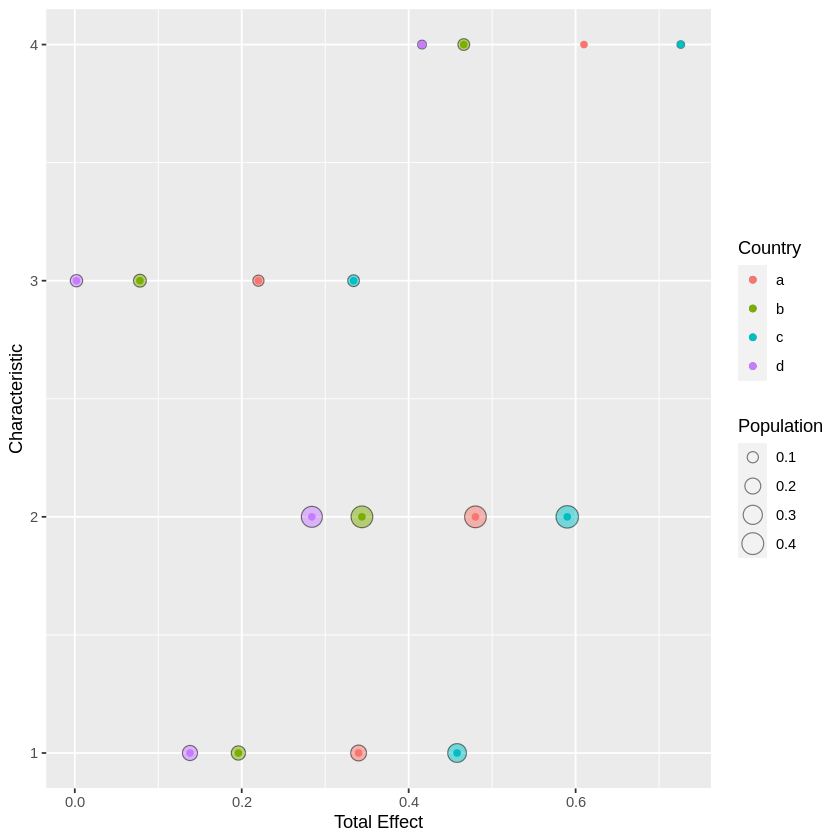

In [16]:
library(ggplot2)
ggplot(data=data3)+
geom_point(
  mapping = aes(y=Characteristic, x=`Total Effect`, fill=Country, size=Population),
  shape=21,
  alpha=0.5
)+
geom_point(
  mapping = aes(y=Characteristic, x=`Total Effect`, color=Country)
) -> gg0
gg0

# geom_segment

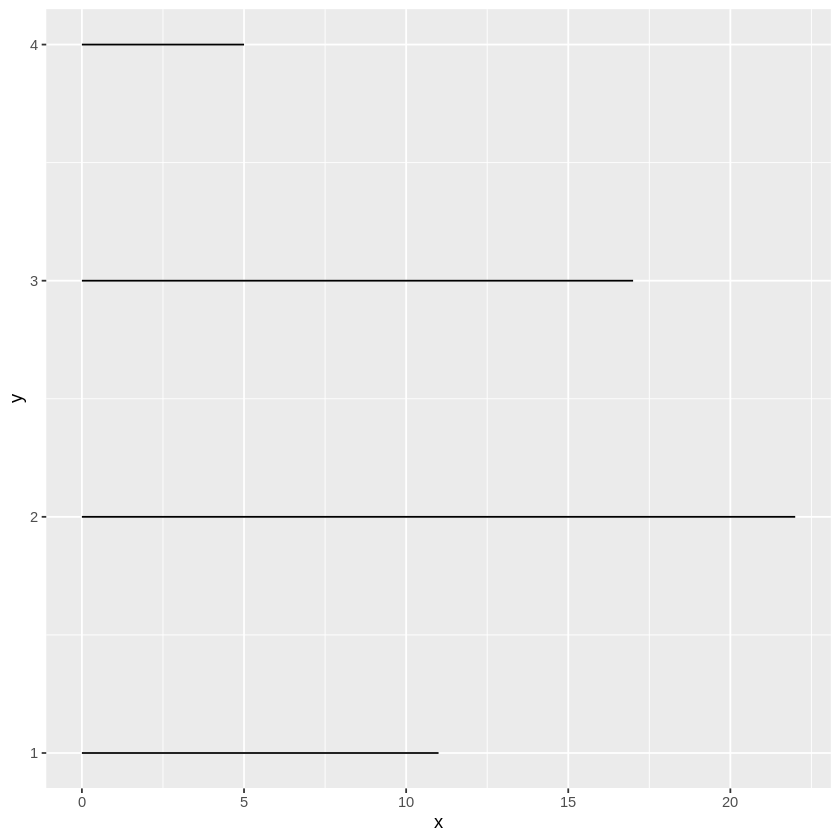

In [7]:
ggplot(data= data.frame(x=0, xend=c(11, 22, 17, 5), y=c(1,2,3,4), yend=c(1,2,3,4)))+
geom_segment(
  aes(
    x=x, xend=xend, y=y, yend=yend
  )
)

In [11]:
library(dplyr)
data3 |> 
  group_by(Characteristic) |>
  summarise(
    max=max(`Total Effect`)
  ) |>
  ungroup() -> data3max
print(data3max)

# A tibble: 4 × 2
  Characteristic   max
           <dbl> <dbl>
1              1 0.458
2              2 0.59 
3              3 0.334
4              4 0.726


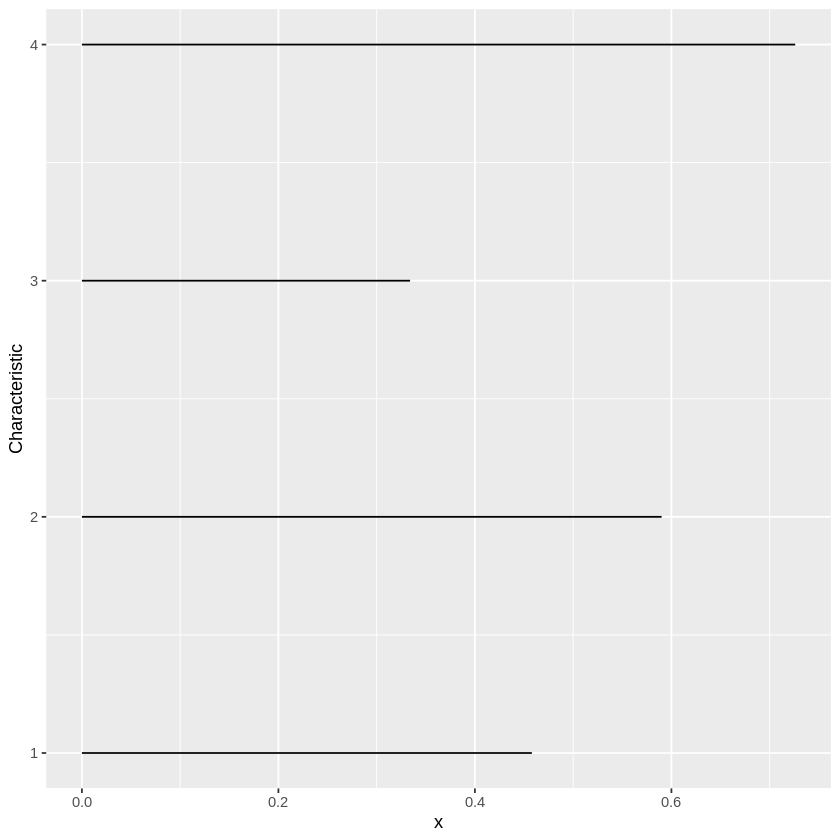

In [14]:
ggplot()+
geom_segment(
  data=data3max,
  mapping=aes(x=0, xend=max, y=Characteristic, yend=Characteristic)
)

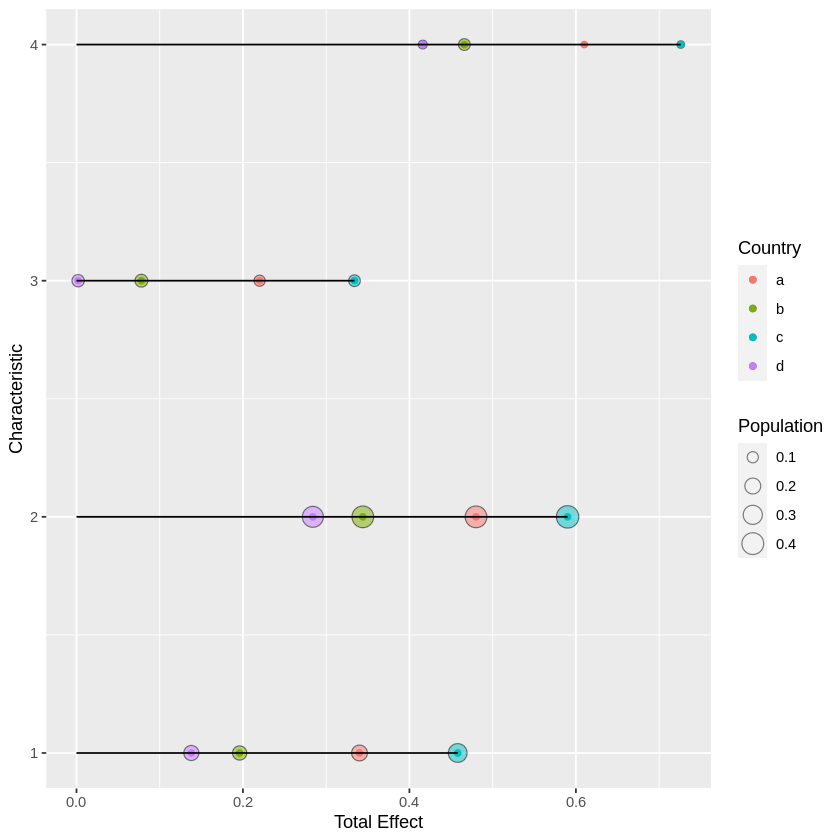

In [17]:
library(ggplot2)
gg0+
geom_segment(
  data=data3max,
  mapping=aes(x=0, xend=max, y=Characteristic, yend=Characteristic)
)

# geom_col(umn)

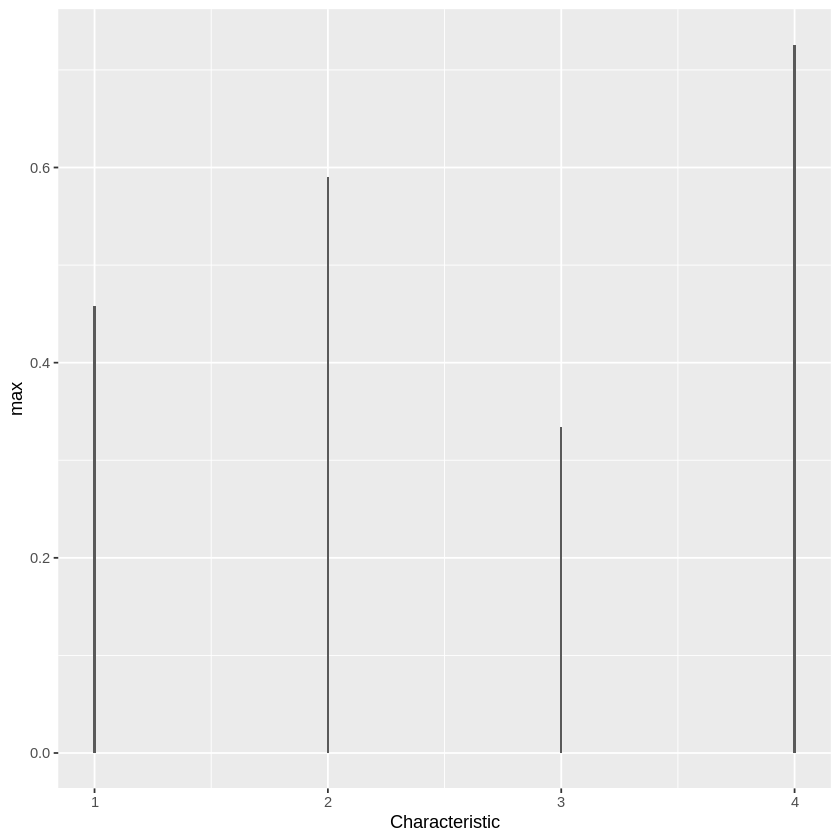

In [26]:
ggplot()+
geom_col(
  data=data3max,
  aes(
    x=Characteristic,
    y=max
  ),
  width=0.01
)